PA2 Notebook 3: Visualization
===

This is the third notebook for DRWI Pollution Assessment Stage 2 (PA2) analysis.

It reads GeoDataFrames of calculated PA2 results prepared in Notebook 2 and plots hotspot maps.

# Installation and Setup

Carefully follow our **[Installation Instructions](README.md#get-started)**, especially including:
- Creating a virtual environment for this repository (step 3)

In [1]:
from pathlib import Path
from importlib import reload
import warnings

import pandas as pd
import numpy as np

# geo packages
import geopandas as gpd
from shapely.geometry import Polygon
import contextily as ctx

# packages for viz 
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from  matplotlib.colors import LogNorm

# import colorcet and plotting libraries
import colorcet as cc
from colorcet.plotting import swatch, swatches, sine_combs

In [2]:
# Confirm that this repo is in your Python Path
!conda-develop /Users/aaufdenkampe/Documents/Python/pollution-assessment/src

path exists, skipping C:\Users\aaufdenkampe\Documents\Python\pollution-assessment\src
completed operation for: C:\Users\aaufdenkampe\Documents\Python\pollution-assessment\src


In [3]:
# Custom functions for Pollution Assessment
import pollution_assessment as pa

In [4]:
print("Geopandas: ", gpd.__version__)
# print("spatialpandas: ", spd.__version__)
# print("datashader: ", ds.__version__)
# print("pygeos: ", pygeos.__version__)

Geopandas:  0.10.2


## Set Paths


In [5]:
# Set your project directory to your local folder for your clone of this repository
project_path = Path.cwd().parent
project_path

WindowsPath('C:/Users/clulay/OneDrive - LimnoTech/Documents/GitHub/pollution-assessment')

In [6]:
# Assign relative paths for PA21 data INPUT folders. 
pa1_data_path = project_path / 'stage1/data/'

In [7]:
# Assign a path for the geographies folder.
geography_path = project_path / 'geography'

In [8]:
# Assign relative paths for the PA2 data OUTPUT folder.
data_output_path = project_path / 'stage2/data_output'

## Open Files from PA2 Notebook 2 & PA1

In [9]:
%%time
# Read PA2 calculated and combined results from Parquet files
reach_concs_gdf = gpd.read_parquet(data_output_path /'reach_concs_gdf.parquet')
catch_loads_gdf = gpd.read_parquet(data_output_path /'catch_loads_gdf.parquet')

CPU times: total: 500 ms
Wall time: 518 ms


In [10]:
catch_loads_gdf

catchment_hectares  watershed_hectares    maflowv  \
comid                                                          
1748535             6496.7052             6501.69     43.699   
1748537             1663.1712             1664.46     11.189   
1748539             1639.4128             1640.70     11.223   
1748541             3013.8348            12912.30     86.528   
1748543             1151.0990             5232.87     35.389   
...                       ...                 ...        ...   
932040366           2124.7248          2720941.47  17802.923   
932040367            788.7859          2717821.26  17788.281   
932040368            265.0275          2716120.08  17780.448   
932040369           1106.5294          2889095.67  18624.999   
932040370           1531.4679          2891976.48  18637.381   

                                              geom_catchment cluster  \
comid                                                                  
1748535    MULTIPOLYGON (((-8301340.781 5199034.787, -830...     drb   
1748537    MULTIPOLYGON (((-8304909.314 5200051.727, -830...     drb   
1748539    MULTIPOLYGON (((-8315191.630 5191704.467, -831...     drb   
1748541    MULTIPOLYGON (((-8309824.403 5193427.492, -830...     drb   
1748543    MULTIPOLYGON (((-8312514.529 5185023.831, -831...     drb   
...                                                      ...     ...   
932040366  MULTIPOLYGON (((-8403944.327 4826463.781, -840...     drb   
932040367  MULTIPOLYGON (((-8400739.269 4832000.931, -840...     drb   
932040368  MULTIPOLYGON (((-8399608.027 4833463.133, -839...     drb   
932040369  MULTIPOLYGON (((-8409371.984 4816335.622, -840...     drb   
932040370  MULTIPOLYGON (((-8411052.928 4811112.367, -841...     drb   

           sub_focusarea   nord  nordstop         huc12  streamorder  ...  \
comid                                                                 ...   
1748535             <NA>  74914     74914  020401020302            1  ...   
1748537             <NA>  74913     74913  020401020302            1  ...   
1748539             <NA>  74921     74921  020401020305            1  ...   
1748541             <NA>  74911     74915  020401020302            2  ...   
1748543             <NA>  74920     74922  020401020305            2  ...   
...                  ...    ...       ...           ...          ...  ...   
932040366           <NA>  65070     76964  020402060103            7  ...   
932040367           <NA>  65079     76964  020402060103            7  ...   
932040368           <NA>  65080     76960  020402060103            7  ...   
932040369           <NA>  64232     76965  020402040000            7  ...   
932040370           <NA>  64226     76965  020402060105            7  ...   

           tss_loadrate_rem1 tn_loadrate_rem2 tp_loadrate_rem2  \
comid                                                            
1748535          -754.235266       -15.118158        -0.126891   
1748537          -802.745763       -14.802445        -0.091522   
1748539          -770.450953       -15.158687        -0.092100   
1748541          -718.840405       -14.943303        -0.088034   
1748543          -750.961155       -14.534826        -0.034210   
...                      ...              ...              ...   
932040366        -253.443080       -11.311054        -0.009946   
932040367        -390.234005        -9.776384         0.081706   
932040368        -640.096341       -16.357360        -0.238284   
932040369         994.343399       -15.954640        -0.108842   
932040370         125.578054       -12.812254         0.105789   

          tss_loadrate_rem2  tn_loadrate_rem3  tp_loadrate_rem3  \
comid                                                             
1748535         -754.235266        -15.118159         -0.126891   
1748537         -802.745763        -14.802446         -0.091522   
1748539         -770.450953        -15.158689         -0.092100   
1748541         -718.840405        -14.943305

In [11]:
# Read DRWI geometries from `geography` folder
cluster_gdf = gpd.read_parquet(geography_path / 'cluster_gdf.parquet')
focusarea_gdf = gpd.read_parquet(geography_path /'focusarea_gdf.parquet')


In [12]:
# Test plotting with PA1 parquet files
base_reach_final_gdf = gpd.read_parquet(pa1_data_path  /'base_reach_final_gdf.parquet')
base_catch_final_gdf = gpd.read_parquet(pa1_data_path /'base_catch_final_gdf.parquet')

In [13]:
%%time
# Reproject CRS for all PA1 GeoDataFrames to 3857
gdfs = [
    base_reach_final_gdf, base_catch_final_gdf,
]

for gdf in gdfs:
    gdf.to_crs(epsg=3857, inplace=True)

CPU times: total: 250 ms
Wall time: 257 ms


In [14]:
base_catch_final_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 19496 entries, 1748535 to 932040370
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tp_load             19496 non-null  float64 
 1   tn_load             19496 non-null  float64 
 2   tss_load            19496 non-null  float64 
 3   catchment_hectares  19496 non-null  float64 
 4   watershed_hectares  19496 non-null  float64 
 5   tp_loadrate_ws      19496 non-null  float64 
 6   tn_loadrate_ws      19496 non-null  float64 
 7   tss_loadrate_ws     19496 non-null  float64 
 8   maflowv             19496 non-null  float64 
 9   geom_catchment      19496 non-null  geometry
 10  cluster             17358 non-null  category
 11  sub_focusarea       186 non-null    Int64   
 12  nord                18870 non-null  Int64   
 13  nordstop            18844 non-null  Int64   
 14  huc12               19496 non-null  category
 15  streamorder       

# Plot Data for Pollution Assessment

In [15]:
warnings.filterwarnings('ignore', message='.*This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.*')

In [16]:
# Reload module to apply any new edits to functions
reload(pa.calc)
reload(pa.plot)

<module 'pollution_assessment.plot' from 'C:\\Users\\clulay\\OneDrive - LimnoTech\\Documents\\GitHub\\pollution-assessment\\src\\pollution_assessment\\plot.py'>

Reach values (min, mid, max) = (0.009, 0.09, 0.6572788697315387)
Catch values (min, mid, max) = (0.031, 0.31, 3.650792538107121)


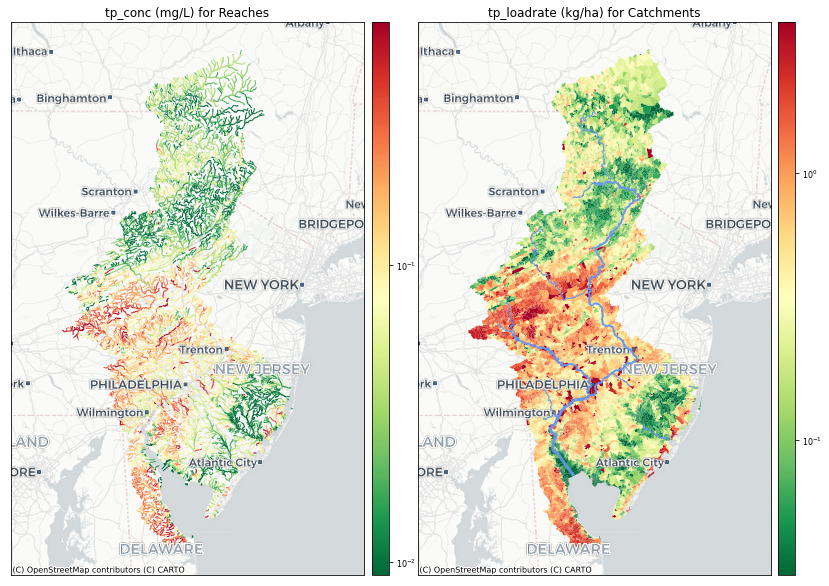

In [17]:
pa.plot.PlotMaps(
    reach_concs_gdf, catch_loads_gdf,
    'tp_conc', 'tp_loadrate', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    colormap='RdYlGn_r',
    cl=None, fa=False, zoom=False, diff=False,
    include_reach=True
)

Reach values (min, mid, max) = (0.09, 0.23270659407666747, 0.6572788697315387)
Catch values (min, mid, max) = (0.31, 0.7955066361139699, 3.650792538107121)


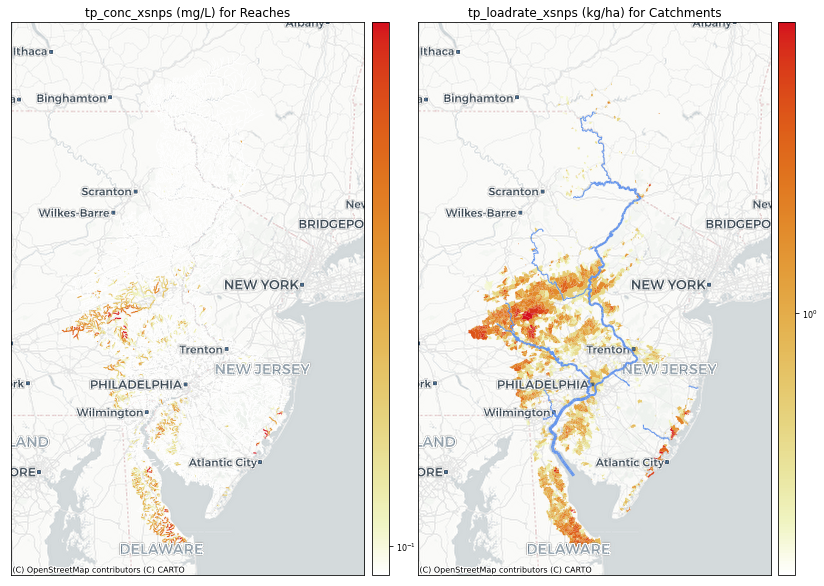

In [18]:
pa.plot.PlotMaps(
    reach_concs_gdf, catch_loads_gdf,
    'tp_conc_xsnps', 'tp_loadrate_xsnps', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    # colormap='cet_CET_L18',
    cl=None, fa=False, zoom=False, diff=True,
    include_reach=True
)

Reach values (min, mid, max) = (0.09, 0.23270659407666747, 0.6572788697315387)
Catch values (min, mid, max) = (0.31, 0.7955066361139699, 3.650792538107121)
Cluster Name =  Brandywine and Christina


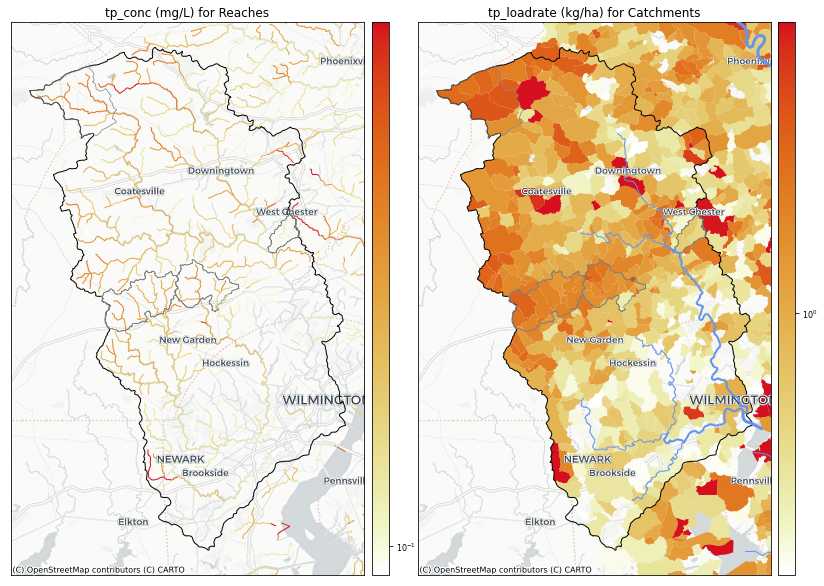

In [19]:
# test on a vertically-aligned cluster
pa.plot.PlotMaps(
    reach_concs_gdf, catch_loads_gdf, 
    'tp_conc', 'tp_loadrate', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    cl=cluster_gdf.index[2], cluster_gdf=cluster_gdf,
    fa=True, focusarea_gdf=focusarea_gdf, zoom=True, 
    diff=True, include_reach = True,
)

Reach values (min, mid, max) = (0.09, 0.23270659407666747, 0.6572788697315387)
Catch values (min, mid, max) = (0.31, 0.7955066361139699, 3.650792538107121)
Cluster Name =  Brandywine and Christina


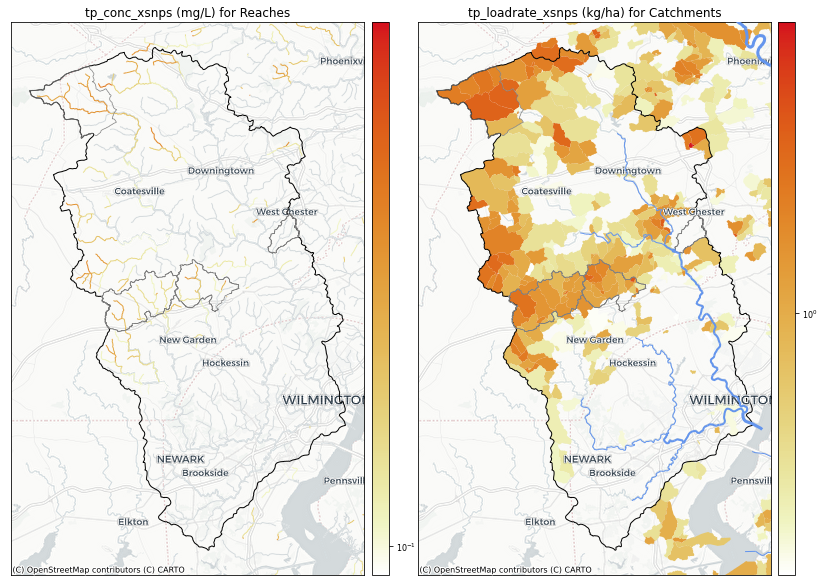

In [20]:
# test on a vertically-aligned cluster
pa.plot.PlotMaps(
    reach_concs_gdf, catch_loads_gdf, 
    'tp_conc_xsnps', 'tp_loadrate_xsnps', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    cl=cluster_gdf.index[2], cluster_gdf=cluster_gdf,
    fa=True, focusarea_gdf=focusarea_gdf, zoom=True, 
    diff=True, include_reach = True,
)

Reach values (min, mid, max) = (0.09, 0.23270659407666747, 0.6572788697315387)
Catch values (min, mid, max) = (0.31, 0.7955066361139699, 3.650792538107121)
Cluster Name =  Brandywine and Christina


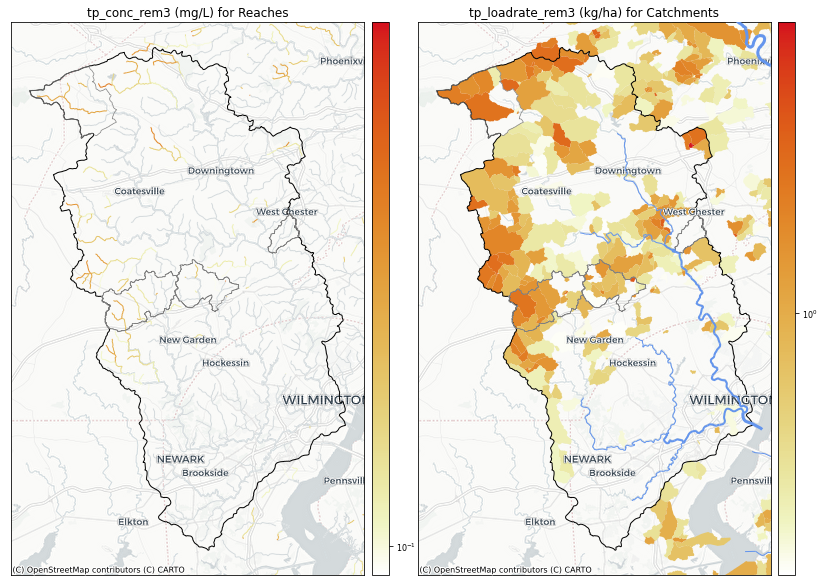

In [21]:
# test on a vertically-aligned cluster
pa.plot.PlotMaps(
    reach_concs_gdf, catch_loads_gdf, 
    'tp_conc_rem3', 'tp_loadrate_rem3', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    cl=cluster_gdf.index[2], cluster_gdf=cluster_gdf,
    fa=True, focusarea_gdf=focusarea_gdf, zoom=True, 
    diff=True, include_reach = True,
)

Cluster Name =  Brandywine and Christina


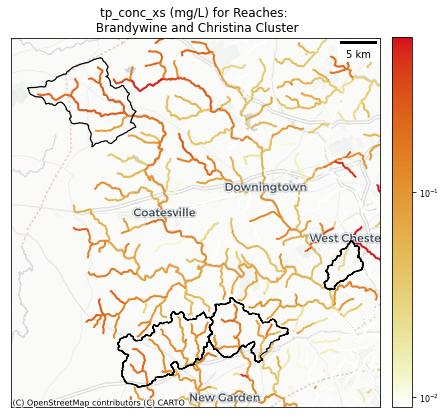

Cluster Name =  Brandywine and Christina


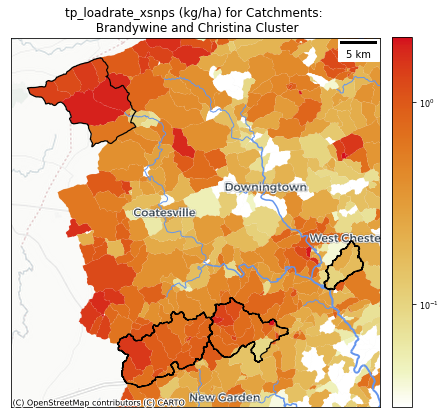

In [22]:
# All FAs in one plot for Cluster
cluster_name = cluster_gdf.index.categories[0]

fa_map1 = pa.plot.PlotMaps_FA_single_pane(reach_concs_gdf,  
                                'tp_conc_xs', 
                                pa.calc.tp_conc_target,
                                geometry='reach',
                                cl=cluster_name, 
                                focusarea_gdf=focusarea_gdf, 
                                diff=True)

fa_map2 = pa.plot.PlotMaps_FA_single_pane(catch_loads_gdf,  
                                'tp_loadrate_xsnps', 
                                pa.calc.tp_loadrate_target,
                                geometry='catchment',
                                cl=cluster_name, 
                                focusarea_gdf=focusarea_gdf,
                                include_reach=True,
                                streamorder_gdf=reach_concs_gdf, 
                                diff=True)

In [23]:
backend = matplotlib.get_backend()
matplotlib.use('agg')

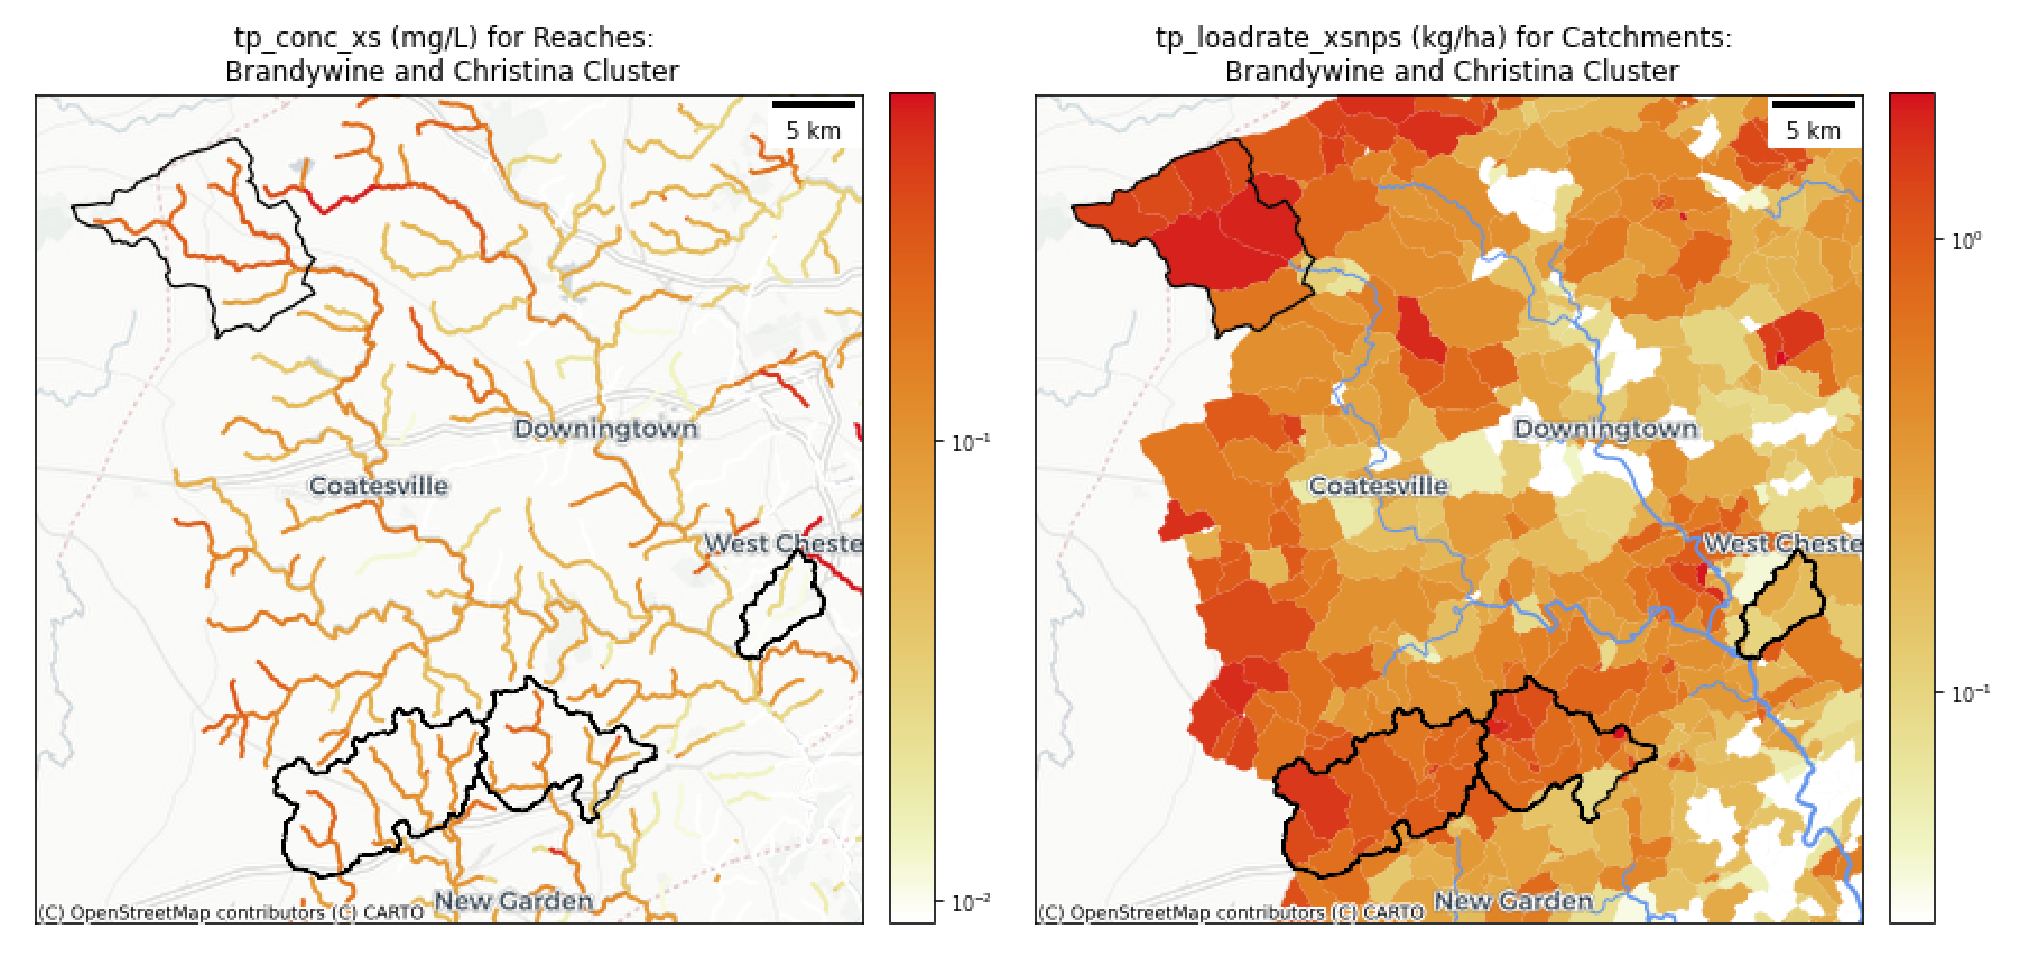

In [24]:
dpi = 100


c1 = fa_map1[4].canvas
c2 = fa_map2[4].canvas
a1 = np.array(c1.buffer_rgba())
a2 = np.array(c2.buffer_rgba())
a = np.hstack((a1,a2))
matplotlib.use(backend)
fig,ax = plt.subplots(figsize=(2000/dpi, 1000/dpi), dpi=dpi)
fig.subplots_adjust(0, 0, 1, 1)
ax.set_axis_off()

ax.matshow(a)

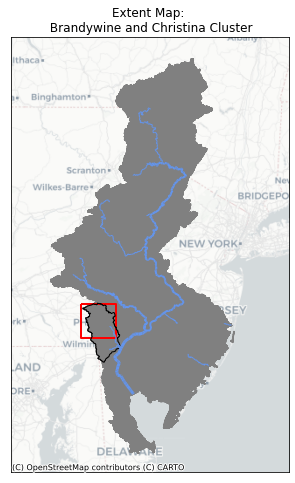

In [25]:
pa.plot.Extent_Map(catch_loads_gdf, [fa_map1], cluster_name, cluster_gdf, reach_concs_gdf)

## PA1 plot tests

Reach values (min, mid, max) = (0.009, 0.09, 0.6000019999999989)
Catch values (min, mid, max) = (0.031, 0.31, 1.8956114972242)


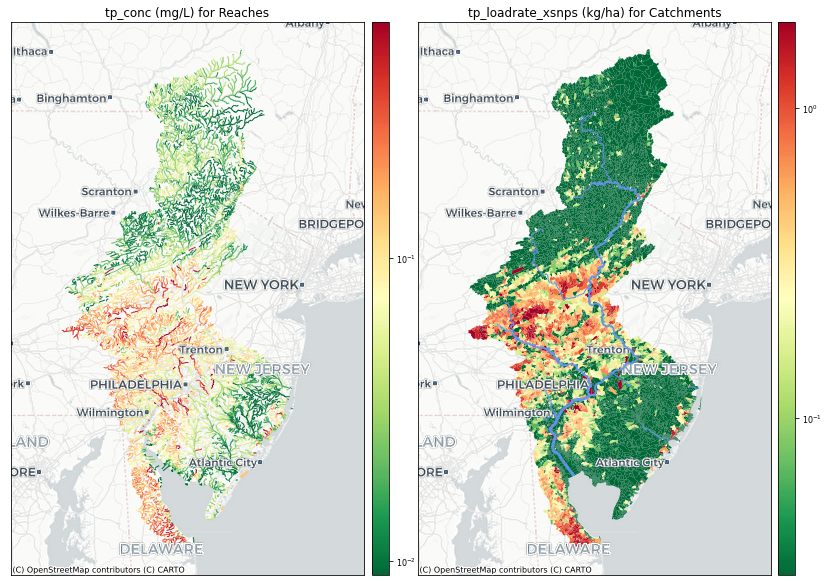

In [26]:
# Stage 1 overview
pa.plot.PlotMaps(
    base_reach_final_gdf, base_catch_final_gdf,
    'tp_conc', 'tp_loadrate_xsnps', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    colormap='RdYlGn_r',
    include_reach=True
)

Reach values (min, mid, max) = (0.009, 0.09, 0.6000019999999989)
Catch values (min, mid, max) = (0.031, 0.31, 3.0635510779536945)


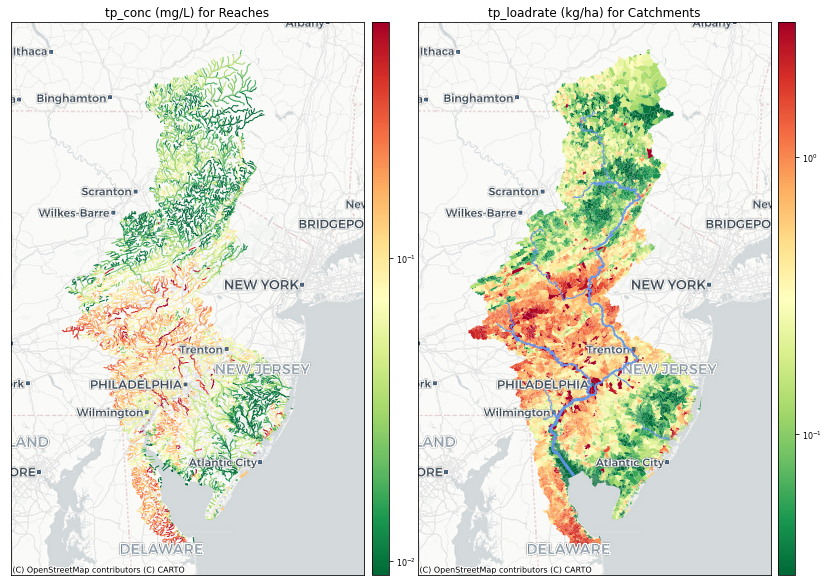

In [27]:
pa.plot.PlotMaps(
    base_reach_final_gdf, base_catch_final_gdf,
    'tp_conc', 'tp_loadrate', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    colormap='RdYlGn_r',
    cl=None, fa=False, zoom=False, diff=False,
    include_reach=True
)